<a href="https://colab.research.google.com/github/vamsi633/NLP-basics/blob/main/Bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**word embedding**

word embedding has 2 types

1. count or frequecy based
2.prediction based

count based has : 1.bag of words , 2.TF-IDF, 3.Glove

prediction based has : word2vec ->1 . cbow , 2.skipgrams

**Bag of words**

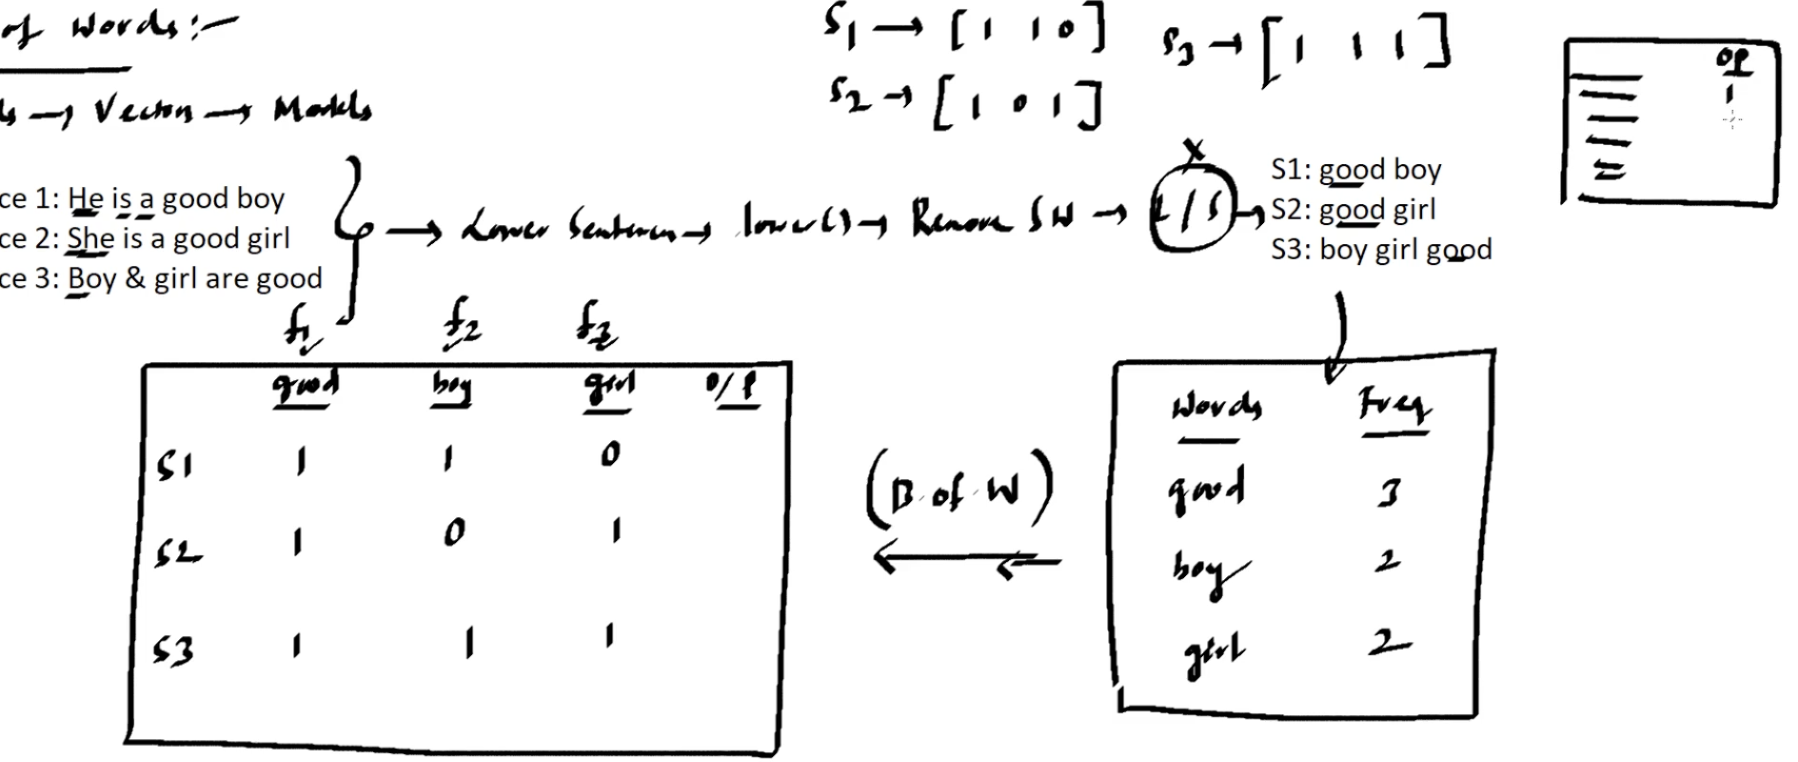

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('spam.csv')

In [4]:
df.Category.value_counts()

,count
Category,
ham,4825
spam,747


In [5]:
df.Category.value_counts()/len(df)*100

,count
Category,
ham,86.593683
spam,13.406317


creating new column called spam and marking the value as 1 if it is in spam category.

In [6]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [7]:
df.head(5)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df.shape

(5572, 3)

Splitting dataset into train and test . split as you wish in %

In [9]:
x_train,x_test,y_train,y_test,=train_test_split(df.Message,df.spam,test_size=0.2)

In [10]:
x_train.size

4457

In [11]:
x_test.size

1115

In [12]:
x_train[:4]

,Message
3165,TODAY is Sorry day.! If ever i was angry with ...
4858,Thanks and ! Or bomb and date as my phone wan...
11,"SIX chances to win CASH! From 100 to 20,000 po..."
1079,Convey my regards to him


In [13]:
y_train[:4]

,spam
3165,0
4858,0
11,1
1079,0


#### **create bag of words representation using count vectorization**

CountVectorizer : It will learn the vocabulary of the corpus (text data) and then convert the text into a numerical form (a document-term matrix).

fit_transform(): This method is used to first fit the CountVectorizer to the training data (x_train.values) and then transform the data into a sparse matrix, where each column corresponds to a word in the vocabulary, and each row corresponds to a document in the training set.

In [35]:
v=CountVectorizer()
x_train_cv=v.fit_transform(x_train.values)
x_test_cv=v.transform(x_test)

In [17]:
x_train_cv

<4457x7867 sparse matrix of type '<class 'numpy.int64'>'
	with 59117 stored elements in Compressed Sparse Row format>

In [18]:
x_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
x_train_cv.shape

(4457, 7867)

In [21]:
v.get_feature_names_out()[1771]

'cheek'

In [22]:
v.vocabulary_

{'today': 7033,
 'is': 3807,
 'sorry': 6413,
 'day': 2212,
 'if': 3662,
 'ever': 2711,
 'was': 7499,
 'angry': 965,
 'with': 7661,
 'you': 7827,
 'misbehaved': 4566,
 'or': 5041,
 'hurt': 3622,
 'plz': 5343,
 'just': 3941,
 'slap': 6303,
 'urself': 7320,
 'bcoz': 1268,
 'its': 3825,
 'ur': 7307,
 'fault': 2834,
 'basically': 1244,
 'good': 3239,
 'thanks': 6896,
 'and': 960,
 'bomb': 1429,
 'date': 2204,
 'as': 1082,
 'my': 4727,
 'phone': 5267,
 'wanted': 7487,
 'to': 7027,
 'say': 6013,
 'six': 6284,
 'chances': 1733,
 'win': 7635,
 'cash': 1685,
 'from': 3074,
 '100': 266,
 '20': 347,
 '000': 1,
 'pounds': 5423,
 'txt': 7193,
 'csh11': 2122,
 'send': 6099,
 '87575': 702,
 'cost': 2045,
 '150p': 314,
 '6days': 605,
 '16': 323,
 'tsandcs': 7159,
 'apply': 1024,
 'reply': 5800,
 'hl': 3506,
 'info': 3735,
 'convey': 2021,
 'regards': 5752,
 'him': 3492,
 'dont': 2449,
 'have': 3417,
 'any': 991,
 'of': 4958,
 'your': 7832,
 'file': 2888,
 'in': 3702,
 'bag': 1203,
 'work': 7706,
 'when

In [24]:
x_train_np=x_train_cv.toarray()
x_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
np.where(x_train_np[0]!=0)

(array([ 965, 1244, 1268, 2212, 2711, 2834, 3239, 3622, 3662, 3807, 3825,
        3941, 4566, 5041, 5343, 6303, 6413, 7033, 7307, 7320, 7499, 7661,
        7827]),)

#### Naive Bayes Classifier

In [32]:
model=MultinomialNB()
model.fit(x_train_cv,y_train)


MultinomialNB()

In [36]:
y_pred=model.predict(x_test_cv)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       953
           1       0.97      0.94      0.96       162

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#### test on random data

In [52]:
message={"Price alert: Bitcoin (BTC) is up"}

In [53]:
message_cnt=v.transform(message)
model.predict(message_cnt)


array([1])